In [ ]:
%pip install stable_baselines3

In [ ]:
%pip install 'shimmy>=0.2.1'

In [1]:
import gym
import numpy as np
import math
from stable_baselines3 import PPO

# Define the custom Gym environment for the mass-spring-damper system
class MassSpringDamperEnv(gym.Env):
    def __init__(self):
        super(MassSpringDamperEnv, self).__init__()

        # System parameters
        self.m = 1.0  # Mass (kg)
        self.k = 1.0  # Spring constant (N/m)
        self.c = 0.1  # Damping coefficient (N*s/m)

        # Simulation parameters
        self.dt = 0.01  # Time step (s)
        self.max_steps = 1000  # Maximum simulation steps
        self.current_step = 0

        # State and action spaces
        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(1,))
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(2,))

        # Initial state
        self.state = None

    def reset(self):
        # Reset the environment to an initial state
        self.state = np.array([10.0, 0.0])  # Initial position and velocity
        self.current_step = 0
        return self.state

    def step(self, action):
        # Apply control action and simulate one time step using Euler integration
        force = action[0]
        position, velocity = self.state

        acceleration = (force - self.c * velocity - self.k * position) / self.m
        velocity += acceleration * self.dt
        position += velocity * self.dt

        self.state = np.array([position, velocity])
        self.current_step += 1

        # Calculate the reward (e.g., minimize position error)
        reward = -abs(position)  # Negative position as the reward (minimize position error)

        # Check if the episode is done
        done = self.current_step >= self.max_steps

        return self.state, reward, done, {}

    def render(self, mode='human'):
        pass

    def close(self):
        pass

# Create the custom mass-spring-damper environment
env = MassSpringDamperEnv()

# Create a PPO agent
# model = PPO("MlpPolicy", env, verbose=1)

# # Train the agent
# model.learn(total_timesteps=1000000)

# # Test the trained agent
# obs = env.reset()
# for _ in range(1000):
#     action, _ = model.predict(obs)
#     obs, reward, done, _ = env.step(action)
#     print(f"Position: {obs[0]}, Velocity: {obs[1]}, Reward: {reward}")
#     if done:
#         break

# env.close()

2024-01-10 19:38:47.415332: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model = PPO("MlpPolicy", env, verbose=1)

# Test the trained agent
obs = env.reset()
for i in range(10000):
    action, _ = model.predict(obs)
    obs, reward, done, _ = env.step(action)
    print(f"Posxition: {obs[0]}, Velocity: {obs[1]}, Reward: {reward}, i={i}, action: {action}")
    # if done:
    #     break

env.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Posxition: 9.999014746437966, Velocity: -0.09852535620331765, Reward: -9.999014746437966, i=0, action: [0.14746438]
Posxition: 9.997068432038605, Velocity: -0.19463143993611634, Reward: -9.997068432038605, i=1, action: [0.37855384]
Posxition: 9.994156364089427, Velocity: -0.2912067949177015, Reward: -9.994156364089427, i=2, action: [0.3200698]
Posxition: 9.99021548348666, Velocity: -0.39408806027674725, Reward: -9.99021548348666, i=3, action: [-0.32309085]
Posxition: 9.985267583992904, Velocity: -0.49478994937561305, Reward: -9.985267583992904, i=4, action: [-0.11938223]
Posxition: 9.979226105640242, Velocity: -0.6041478352661664, Reward: -9.979226105640242, i=5, action: [-1.]
Posxition: 9.97215988335501, Velocity: -0.7066222285232753, Reward: -9.97215988335501, i=6, action: [-0.328628]
Posxition: 9.964203511303728, Velocity: -0.795637205128302, Reward: -9.964203511303728, i=7, action: [1.]
Po

/Users/Ali/Documents/BAI/Master/master-thesis/.env/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Posxition: -8.31745191793728, Velocity: 2.1298225168014597, Reward: -8.31745191793728, i=338, action: [0.8814055]
Posxition: -8.295296885286092, Velocity: 2.215503265118847, Reward: -8.295296885286092, i=339, action: [0.46360517]
Posxition: -8.272411830520712, Velocity: 2.2885054765380786, Reward: -8.272411830520712, i=340, action: [-0.7735254]
Posxition: -8.248665827854012, Velocity: 2.3746002666700616, Reward: -8.248665827854012, i=341, action: [0.56591773]
Posxition: -8.224158283888404, Velocity: 2.450754396560842, Reward: -8.224158283888404, i=342, action: [-0.3957928]
Posxition: -8.198752831638371, Velocity: 2.540545225003165, Reward: -8.198752831638371, i=343, action: [1.]
Posxition: -8.172465237884127, Velocity: 2.6287593754243335, Reward: -8.172465237884127, i=344, action: [0.87671673]
Posxition: -8.145381557330676, Velocity: 2.708368055345139, Reward: -8.145381557330676, i=345, action: [0.05127869]
Posxition: -8.11751931448058, Velocity: 2.7862242850095544, Reward: -8.11751931

In [2]:
model_test = PPO.load("MBK_RL_model", env, verbose=1)

/Users/Ali/Documents/BAI/Master/master-thesis/.env/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
/Users/Ali/Documents/BAI/Master/master-thesis/.env/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
/Users/Ali/Documents/BAI/Master/master-thesis/.env/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warni

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
model.save('MBK_RL_model')

Position: 9.9989, Velocity: -0.11, Reward: -9.9989, Action: [-1.]
Position: 8.596724952288717, Velocity: -5.237847530837125, Reward: -8.596724952288717, Action: [-1.]
Position: 4.970974767794888, Velocity: -8.82054889056253, Reward: -4.970974767794888, Action: [0.51292044]
Position: 0.35966959627661915, Velocity: -9.225458640784428, Reward: -0.35966959627661915, Action: [1.]
Position: -3.873635091810466, Velocity: -7.404440517948635, Reward: -3.873635091810466, Action: [1.]
Position: -6.735916129963789, Velocity: -3.9031279074725207, Reward: -6.735916129963789, Action: [1.]
Position: -7.610184260839105, Velocity: 0.35991836821624446, Reward: -7.610184260839105, Action: [1.]
Position: -6.38455362025862, Velocity: 4.3289563453675886, Reward: -6.38455362025862, Action: [1.]
Position: -3.4580786022769954, Velocity: 6.96129857475525, Reward: -3.4580786022769954, Action: [-1.]
Position: 0.09747845320780027, Velocity: 6.963311625304434, Reward: -0.09747845320780027, Action: [-1.]
Position: 3.

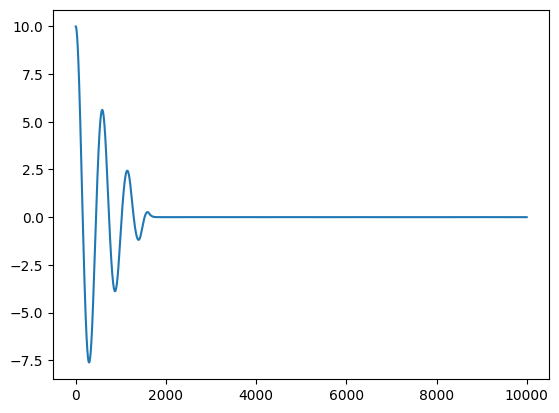

In [4]:
import matplotlib.pyplot as plt
obs = env.reset()
# save data
position = []
for i in range(10000):
    action, _ = model_test.predict(obs)
    obs, reward, done, _ = env.step(action)
    position.append(obs[0])
    if i % 50 == 0:
        print(f"Position: {obs[0]}, Velocity: {obs[1]}, Reward: {reward}, Action: {action}")
    # if done:
        # break
plt.plot(position)